#Prediction using ARIMA Time Series Model

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('MCI_2014_to_2019.csv',sep=',') 
df = df.drop(df[df['occurrenceyear'] < 2014].index)
df = df.iloc[:,[16,17,18,19,22]]
df.head()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,MCI
0,2015.0,December,18.0,352.0,Assault
1,2015.0,August,15.0,227.0,Assault
2,2015.0,August,16.0,228.0,Break and Enter
3,2015.0,November,26.0,330.0,Break and Enter
4,2015.0,December,18.0,352.0,Assault


In [3]:
df['MCI'].value_counts()

Assault            110659
Break and Enter     43215
Auto Theft          23333
Robbery             21502
Theft Over           6671
Name: MCI, dtype: int64

In [4]:
df['month'] = pd.to_datetime(df.occurrencemonth, format='%B').dt.month

df.head()

,occurrenceyear,occurrencemonth,occurrenceday,occurrencedayofyear,MCI,month
0,2015.0,December,18.0,352.0,Assault,12.0
1,2015.0,August,15.0,227.0,Assault,8.0
2,2015.0,August,16.0,228.0,Break and Enter,8.0
3,2015.0,November,26.0,330.0,Break and Enter,11.0
4,2015.0,December,18.0,352.0,Assault,12.0


In [5]:
df=df.rename(columns = {'occurrenceyear':'year'})
df=df.rename(columns = {'occurrenceday':'day'})

df.head()

,year,occurrencemonth,day,occurrencedayofyear,MCI,month
0,2015.0,December,18.0,352.0,Assault,12.0
1,2015.0,August,15.0,227.0,Assault,8.0
2,2015.0,August,16.0,228.0,Break and Enter,8.0
3,2015.0,November,26.0,330.0,Break and Enter,11.0
4,2015.0,December,18.0,352.0,Assault,12.0


In [6]:
df['Date'] = pd.to_datetime(df[['year', 'month']].assign(Day=1))

In [7]:
df.drop(df.columns[0:4], axis=1, inplace=True)
df.drop(df.columns[1], axis=1, inplace=True)


In [8]:
df.head()


,MCI,Date
0,Assault,2015-12-01
1,Assault,2015-08-01
2,Break and Enter,2015-08-01
3,Break and Enter,2015-11-01
4,Assault,2015-12-01


In [9]:
#frequency counts
df = df.groupby('Date')['MCI'].value_counts().reset_index(name='FC')

In [10]:
FC_MCI = df.groupby(['Date'], as_index=False)['FC'].sum()

In [11]:
dates = pd.date_range(start='2014-01-01', freq='MS', periods=len(FC_MCI))

FC_MCI.set_index(dates, inplace=True)

In [12]:
MCI = FC_MCI
MCI.head()
MCI_total = MCI['FC']

In [13]:
MCI_total.head()

2014-01-01    2448
2014-02-01    2203
2014-03-01    2420
2014-04-01    2509
2014-05-01    2856
Freq: MS, Name: FC, dtype: int64

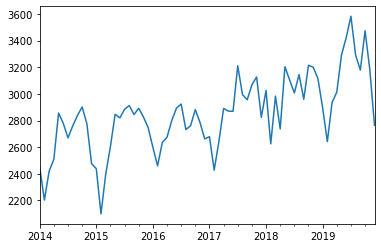

In [14]:
# Plot the time series using the DataFrame's .plot() method.
MCI_total.plot()
plt.show()

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
# Run Dicky-Fuller test
result = adfuller(MCI_total)

In [17]:
# Print test statistic
print(result)

(-0.014263537039916358, 0.9573364854172691, 12, 59, {'1%': -3.5463945337644063, '5%': -2.911939409384601, '10%': -2.5936515282964665}, 766.485516865103)


In [18]:
# Import ACF and PCF functions
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

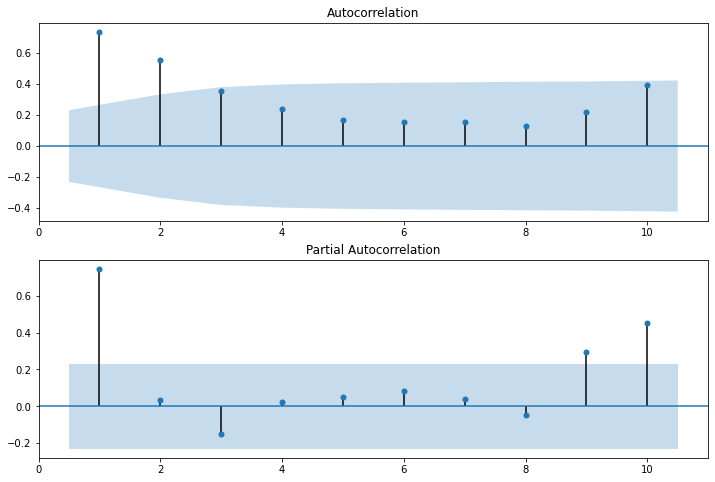

In [19]:
# Create figure
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(12,8))
 
# Plot the ACF on ax1
plot_acf(MCI_total, lags=10, zero=False, ax=ax1)

# Plot the PACF of on ax2
plot_pacf(MCI_total, lags=10, zero=False, ax=ax2)

plt.show()

In [20]:
# Import the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [50]:
# Loop over p values from 0-5
for p in range(5):
# Loop over q values from 0-5
    for q in range(5):
        try:
            # Create and fit ARIMA(p,d,q) model
            model = SARIMAX(MCI_total, order=(p,1,q), trend='c')
            results = model.fit()
        
            # Print p, q, AIC, BIC
            print(p, q, results.aic, results.bic)
        
        except:
            print(p, q, None, None)

0 0 958.0975463348444 962.622906088927
0 1 957.0413747565797 963.8294143877037
0 2 959.0365361313053 968.0872556394705


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 3 947.0775197029113 958.3909190881179


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


0 4 948.3500297697641 961.9261090320119
1 0 956.8821249775278 963.6701646086518
1 1 958.451891775282 967.5026112834472
1 2 949.0968494077321 960.4102487929387
1 3 948.5177456274232 962.093824889671


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


1 4 949.2005020703753 965.0392612096645
2 0 958.7483857852876 967.7991052934528


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 1 958.1151204300377 969.4285198152443


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 2 947.9280653438558 961.5041446061036


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 3 937.5014905253705 953.3402496646597


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


2 4 952.8941836032772 970.9956226196077
3 0 959.4488938390245 970.7622932242311


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 1 945.3359408274604 958.9120200897082
3 2 949.3938627303439 965.2326218696331


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 3 949.5296145441573 967.6310535604879


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


3 4 959.884491218684 980.2486101120559
4 0 960.5438000846098 974.1198793468576
4 1 945.5066417799103 961.3454009191995


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 2 947.7121441125734 965.8135831289039


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


4 3 950.6985449180729 971.0626638114447
4 4 962.4128277656419 985.039626536055


C:\Users\shivu\Anaconda3\lib\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [51]:
# Instantiate the model
arma = SARIMAX(MCI_total, order=(0,0,1), trend ='c')

In [52]:
results = arma.fit()
print(results.summary())

                               SARIMAX Results                                
Dep. Variable:                     FC   No. Observations:                   72
Model:               SARIMAX(0, 0, 1)   Log Likelihood                -491.759
Date:                Mon, 13 Apr 2020   AIC                            989.518
Time:                        19:25:14   BIC                            996.348
Sample:                    01-01-2014   HQIC                           992.237
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   2849.8226     40.568     70.247      0.000    2770.310    2929.335
ma.L1          0.5372      0.091      5.900      0.000       0.359       0.716
sigma2      4.988e+04   7694.134      6.483      0.0

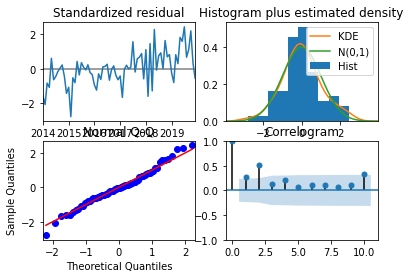

In [53]:
# Create the 4 diagostics plots
results.plot_diagnostics()
plt.show()

In [54]:
# Make in sample predictions 
one_step_forecast = results.get_prediction(start=-25)
# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean


# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()


lower_limits = confidence_intervals.loc[:,]
upper_limits = confidence_intervals.loc[:,]

# Print best estimate predictions
print(mean_forecast)

2017-12-01    2955.778529
2018-01-01    2779.034755
2018-02-01    2982.485509
2018-03-01    2657.791164
2018-04-01    3024.515817
2018-05-01    2695.376961
2018-06-01    3123.040889
2018-07-01    2840.131491
2018-08-01    2939.459742
2018-09-01    2960.233143
2018-10-01    2849.697323
2018-11-01    3046.053127
2018-12-01    2932.518594
2019-01-01    2948.383734
2019-02-01    2821.683458
2019-03-01    2753.301542
2019-04-01    2947.425983
2019-05-01    2885.047123
2019-06-01    3067.889298
2019-07-01    3040.578278
2019-08-01    3141.196614
2019-09-01    2929.755654
2019-10-01    2983.709779
2019-11-01    3113.193003
2019-12-01    2887.858136
Freq: MS, dtype: float64


In [55]:
lower_limits=np.array(lower_limits)

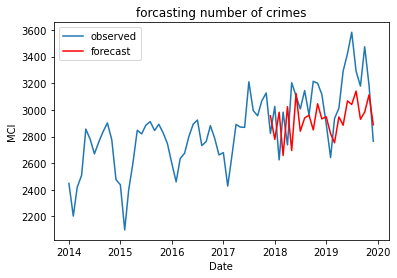

In [56]:
# plot the data
plt.plot(MCI_total.index,MCI_total,label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
# shade the area between your confidence limits
#plt.fill_between(lower_limits.index,lower_limits,upper_limits, color='pink',alpha=1)


# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('MCI')
plt.title('forcasting number of crimes')
plt.legend()
plt.show()

In [57]:
# Make  dynamic predictions
one_step_forecast = results.get_prediction(start=-25, dynamic = True)
# Extract prediction mean
mean_forecast = one_step_forecast.predicted_mean


# Print best estimate predictions
print(mean_forecast)
# Get confidence intervals of predictions
confidence_intervals = one_step_forecast.conf_int()
lower_limits = confidence_intervals.loc[:,]
upper_limits = confidence_intervals.loc[:,]

print(lower_limits)
print(upper_limits)

2017-12-01    2955.778529
2018-01-01    2849.822562
2018-02-01    2849.822562
2018-03-01    2849.822562
2018-04-01    2849.822562
2018-05-01    2849.822562
2018-06-01    2849.822562
2018-07-01    2849.822562
2018-08-01    2849.822562
2018-09-01    2849.822562
2018-10-01    2849.822562
2018-11-01    2849.822562
2018-12-01    2849.822562
2019-01-01    2849.822562
2019-02-01    2849.822562
2019-03-01    2849.822562
2019-04-01    2849.822562
2019-05-01    2849.822562
2019-06-01    2849.822562
2019-07-01    2849.822562
2019-08-01    2849.822562
2019-09-01    2849.822562
2019-10-01    2849.822562
2019-11-01    2849.822562
2019-12-01    2849.822562
Freq: MS, dtype: float64
               lower FC     upper FC
2017-12-01  2518.044824  3393.512233
2018-01-01  2352.931304  3346.713819
2018-02-01  2352.931304  3346.713819
2018-03-01  2352.931304  3346.713819
2018-04-01  2352.931304  3346.713819
2018-05-01  2352.931304  3346.713819
2018-06-01  2352.931304  3346.713819
2018-07-01  2352.931304  3346

In [58]:
mean_forecast.head()

2017-12-01    2955.778529
2018-01-01    2849.822562
2018-02-01    2849.822562
2018-03-01    2849.822562
2018-04-01    2849.822562
Freq: MS, dtype: float64

In [59]:
lower_limits=np.array(lower_limits)

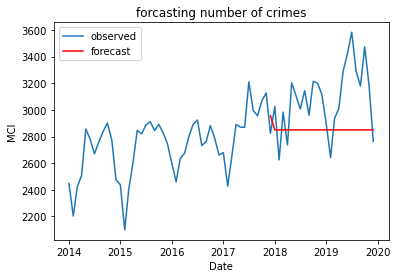

In [60]:
# plot the data
plt.plot(MCI_total.index,MCI_total, label='observed')

# plot your mean predictions
plt.plot(mean_forecast.index, mean_forecast, color='r', label='forecast')
# shade the area between your confidence limits
#plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='color',alpha=1)
# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('MCI')
plt.title('forcasting number of crimes')
plt.legend()
plt.show()

In [61]:
# Make forecast of next 10 values
forecast = results.get_forecast(steps=10)
arma_value_forecast = forecast.predicted_mean

# Print forecast
print(arma_value_forecast)
# Get confidence intervals of predictions
confidence_intervals = forecast.conf_int()
lower_limits = confidence_intervals.loc[:,]
upper_limits = confidence_intervals.loc[:,]

print(lower_limits)
print(upper_limits)

2020-01-01    2783.289373
2020-02-01    2849.822562
2020-03-01    2849.822562
2020-04-01    2849.822562
2020-05-01    2849.822562
2020-06-01    2849.822562
2020-07-01    2849.822562
2020-08-01    2849.822562
2020-09-01    2849.822562
2020-10-01    2849.822562
Freq: MS, dtype: float64
               lower FC     upper FC
2020-01-01  2345.555668  3221.023077
2020-02-01  2352.931304  3346.713819
2020-03-01  2352.931304  3346.713819
2020-04-01  2352.931304  3346.713819
2020-05-01  2352.931304  3346.713819
2020-06-01  2352.931304  3346.713819
2020-07-01  2352.931304  3346.713819
2020-08-01  2352.931304  3346.713819
2020-09-01  2352.931304  3346.713819
2020-10-01  2352.931304  3346.713819
               lower FC     upper FC
2020-01-01  2345.555668  3221.023077
2020-02-01  2352.931304  3346.713819
2020-03-01  2352.931304  3346.713819
2020-04-01  2352.931304  3346.713819
2020-05-01  2352.931304  3346.713819
2020-06-01  2352.931304  3346.713819
2020-07-01  2352.931304  3346.713819
2020-08-01  

In [62]:
lower_limits=np.array(lower_limits)

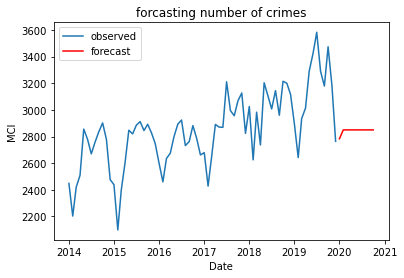

In [63]:
# plot the data
plt.plot(MCI_total.index,MCI_total, label='observed')

# plot your mean predictions
plt.plot(arma_value_forecast.index, arma_value_forecast, color='r', label='forecast')
# shade the area between your confidence limits
#plt.fill_between(lower_limits.index, lower_limits, upper_limits, color='pink')
# set labels, legends and show plot
plt.xlabel('Date')
plt.ylabel('MCI')
plt.title('forcasting number of crimes')
plt.legend()
plt.show()
